In [24]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import math

In [44]:
a0 = 0.05984281113
cla = 4.752798721
cda = 0.6417112299
alpha_stall = np.rad2deg(0.3391428111)
alpha_stallR = 0.3391428111
cla_stall = -3.85
cda_stall = -0.9233984055
area = 0.6
air_density = 1.2041
g = 9.81

In [81]:
# this generates C_L alpha curve
def coefficientLift(cla, alpha, alpha0):
        Cl = cla*(alpha - alpha0)
        return Cl

def dynamic_pressure(rho, v):
    Q = .5 * rho * (v*v)
    return Q    
    
def lift(cl, Q, S):
    L = cl * Q * S
    return L

def velocity(lift, cl, s, rho):
    V = np.sqrt((2 * lift) / (cl * s * rho))
    return V

In [82]:
# fills coeff of lift and angle list 
clList = []
angleList = []
for angle in range(0, 20):
    cl = coefficientLift(cla, angle, a0)
    clList.append(cl)
    angleList.append(angle)

In [75]:
# filles dynamic pressure list
qList = []
for speed in range(0,20):
    dyn_press = dynamic_pressure(air_density, speed)
    qList.append(dyn_press)

In [76]:
# fills lift and velocity list
liftList = []
for j, i in enumerate(qList):
    l = lift(clList[j], qList[j], area)    
    liftList.append(l)

In [77]:
velList = []
for j, i in enumerate(liftList):
    vel = velocity(liftList[j], clList[j], area, air_density)    
    velList.append(vel)

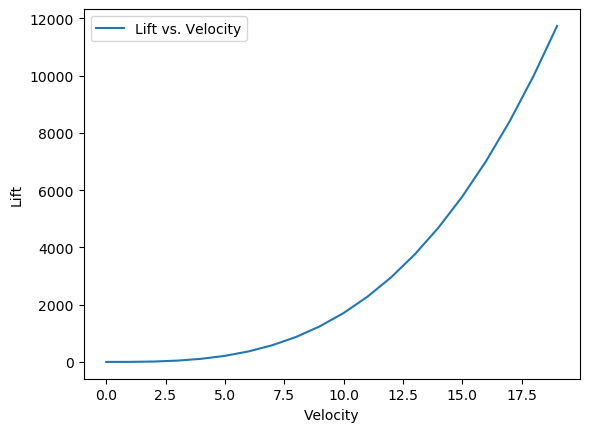

In [79]:
plt.plot(velList, liftList, label="Lift vs. Velocity")
plt.legend()
plt.xlabel("Velocity")
plt.ylabel("Lift")
plt.show() 
# divide by weight and you have g vs v or n vs v

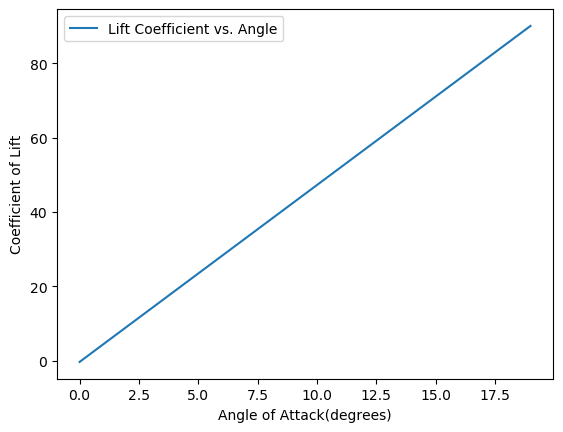

In [80]:
plt.plot(angleList, clList, label="Lift Coefficient vs. Angle")
plt.legend()
plt.xlabel("Angle of Attack(degrees)")
plt.ylabel("Coefficient of Lift")
plt.show()

In [ ]:
# concatenate the slopes and parametrize the alpha values 

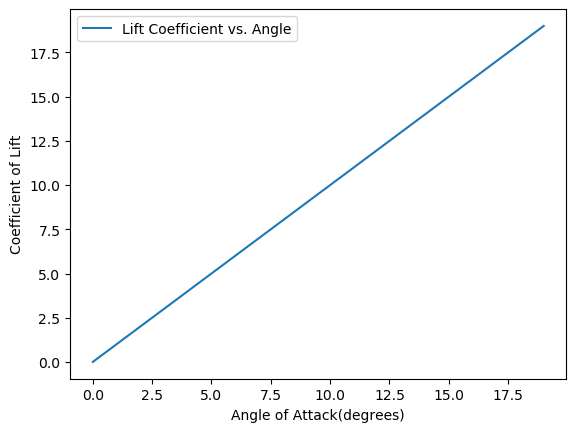

In [86]:
plt.plot(velList, angleList, label="Lift Coefficient vs. Angle")
plt.legend()
plt.xlabel("Angle of Attack(degrees)")
plt.ylabel("Coefficient of Lift")
plt.show()

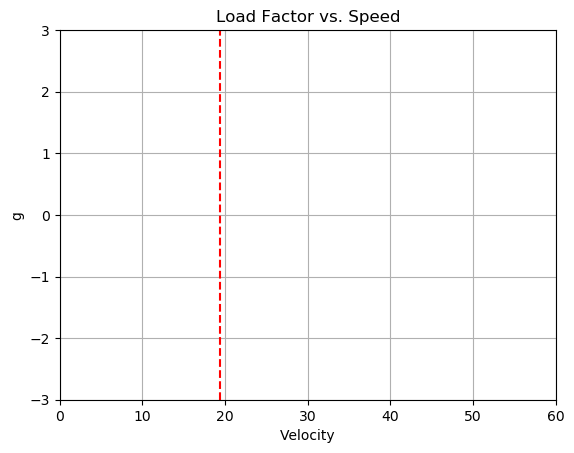

In [95]:
plt.plot(a0, alpha_stall, '-bo')
plt.xlim(0,60)
plt.xlabel('Velocity')
plt.ylim(-3,3) 
plt.ylabel('g')
plt.title('Load Factor vs. Speed')
plt.axvline(x=alpha_stall, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
unaccelerated stall assumes 
pull more alpha when you increase Cl
when you reach stall speed you are CLMax 
to maintan level flight
increaseing alpha the slower you go to make l=w

so set a range of values for velocity and then do the flutter speed equation to determine those bounds on the graph 
to get the negative stall just switch cl to negtaive 